In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# upload date set into data frame
df = pd.read_csv("/Users/OzlemCelik/Desktop/NEW_YORK.csv",skiprows=4, thousands=",")

In [15]:
# all columns of the dataset
print("Features", df.columns)

# number of datapoints
print("Number of data points: ", len(df))

Features Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')
Number of data points:  351


In [18]:
#rename the columns name
df.rename(columns= {'Murder and\nnonnegligent\nmanslaughter': 'Murder',
                   'Rape\n(revised\ndefinition)1':'Rape1',
                   'Rape\n(legacy\ndefinition)2':'Rape2'}, inplace= True)

df.head()

,City,Population,Violent crime,Murder,Rape1,Rape2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [19]:


features = df.loc[:,['Population','Murder', 'Robbery' ]]
features['Population_sq'] = features.Population**2
features['robbery'] = np.where(features.Robbery >0 , 1, 0)
features['murder'] = np.where(features.Murder >0, 1, 0)
features.head()

,Population,Murder,Robbery,Population_sq,robbery,murder
0,1861.0,0.0,0.0,3.463321e+06,0,0
1,2577.0,0.0,0.0,6.640929e+06,0,0
2,2846.0,0.0,0.0,8.099716e+06,0,0
3,97956.0,8.0,227.0,9.595378e+09,1,1
4,6388.0,0.0,4.0,4.080654e+07,1,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


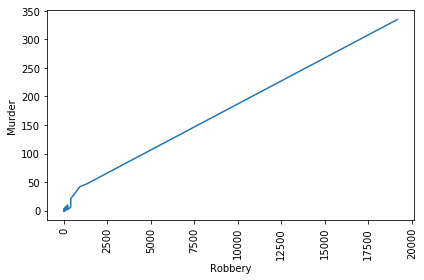

In [23]:
sns.lineplot(x = 'Robbery', y= 'Murder', data = df)
plt.xticks(rotation =90)
plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


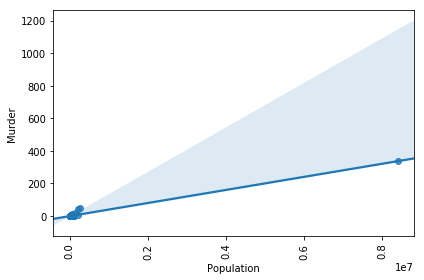

In [28]:
sns.regplot(x = 'Population', y= 'Murder', data = df)
plt.xticks(rotation =90)
plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


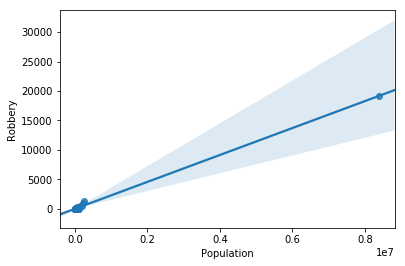

In [29]:
sns.regplot(x = 'Population', y= 'Robbery', data = df)